In [105]:
# Start writing code here..from baselines import *
from baselines import *
from uncertainty import *


from autograd import numpy as np
from autograd import grad, elementwise_grad
from autograd.misc.optimizers import adam, sgd
from sklearn.datasets import make_moons, make_circles
import numpy.random as npr
import pandas as pd
import numpy 
import scipy as sp
import matplotlib.pyplot as plt
import sys
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline

In [ ]:
'''n_train=200
x_train, y_train = make_circles(n_samples=200, factor=.5, noise=.05)'''

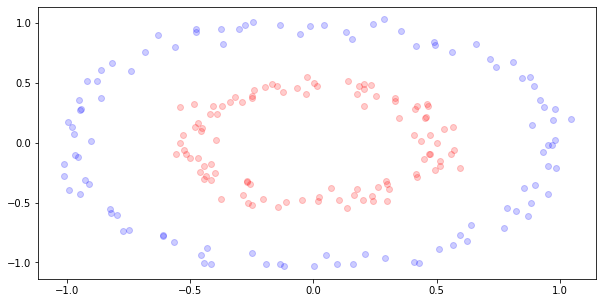

In [ ]:
'''fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], alpha=0.2, c='red', label='class 1')
ax.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], alpha=0.2, c='blue', label='class 0')
plt.show()'''

In [65]:

def generate_circle_train(n_train, radius, jitter):
    rng = np.random.default_rng()
    theta = rng.uniform(low= 0.0, high=2*np.pi, size=n_train)
    dist = rng.normal(loc = radius, scale=jitter, size=n_train)
    posns = dist*np.cos(theta), dist*np.sin(theta)
    x = np.hstack([posns[0].reshape((-1, 1)), posns[1].reshape((-1, 1))])
    y = (theta<np.pi).astype(int)
    return x, y



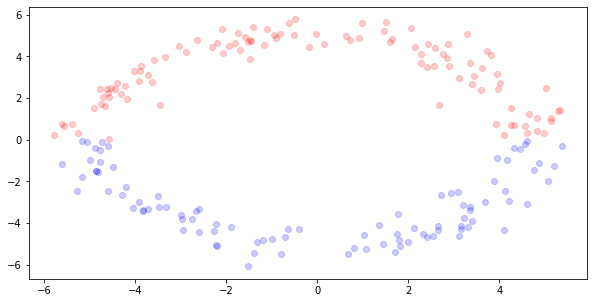

In [ ]:
x_train, y_train = generate_circle_train(200, 5, 0.5)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], alpha=0.2, c='red', label='class 1')
ax.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], alpha=0.2, c='blue', label='class 0')
plt.show()

In [ ]:
# Deterministic model 
###relu activation
activation_fn_type = 'relu' #'leaky_relu'
activation_fn = lambda x: np.maximum(np.zeros(x.shape), x) #np.maximum(np.ones(x.shape)*1e-3, x) #WARNING: CHANGED THIS TO LEAKY RELU

###neural network model design choices
width = 4
hidden_layers = 2
input_dim = x_train.shape[1]
output_dim = 1

architecture = {'width': width,
               'hidden_layers': hidden_layers,
               'input_dim': input_dim,
               'output_dim': output_dim,
               'activation_fn_type': activation_fn_type,
               'activation_fn_params': 'rate=1',
               'activation_fn': activation_fn}

#set random state to make the experiments replicable
rand_state = 0
random = np.random.RandomState(rand_state)

#instantiate a Feedforward neural network object
nn = Feedforward(architecture, random=random)

In [ ]:
###define design choices in gradient descent
params = {'step_size':1e-3, 
          'max_iteration':10000, 
          'random_restarts':1}
        
#fit my neural network to minimize MSE on the given data
nn.fit(x_train.T, y_train.reshape((1,-1)), params, reg_param = 0.0002)

Iteration 0 lower bound 2.454412299104769; gradient mag: 3.111819210040378
Iteration 100 lower bound 1.7612739611688957; gradient mag: 1.9475713192411614
Iteration 200 lower bound 1.3643243738839854; gradient mag: 1.6061810411450037
Iteration 300 lower bound 1.0412546822794972; gradient mag: 1.1606016590984176
Iteration 400 lower bound 0.850868528417802; gradient mag: 0.9897326947547367
Iteration 500 lower bound 0.6984226623282223; gradient mag: 0.8513634306315789
Iteration 600 lower bound 0.5733638158556932; gradient mag: 0.7379904410042387
Iteration 700 lower bound 0.47116230385077557; gradient mag: 0.629534404137456
Iteration 800 lower bound 0.38811629160719807; gradient mag: 0.5460005208529086
Iteration 900 lower bound 0.32114480802103684; gradient mag: 0.472529987088822
Iteration 1000 lower bound 0.2673856514630307; gradient mag: 0.40971722244578046
Iteration 1100 lower bound 0.2240251658056384; gradient mag: 0.35590425907763795
Iteration 1200 lower bound 0.18894833007081857; grad

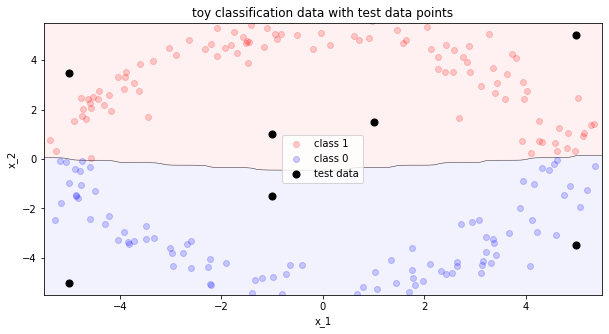

In [ ]:
# defining test points
test_points = [(-10, -10), (-10, 7), (10, 10), (0, 0), (-1, 1), (-1, -1.5), (1, 1.5)]

# Visualize our test data points
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], alpha=0.2, c='red', label='class 1')
ax.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], alpha=0.2, c='blue', label='class 0')
plot_decision_boundary(x_train, y_train, [nn], ax, poly_degree=1, test_points=test_points, shaded=True)
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_title('toy classification data with test data points')
ax.legend(loc='best')
plt.show()

In [ ]:
# Deep ensemble
reg_param = 0.0002
random = np.random.RandomState(rand_state)
N_bootstrap = 20
nn_all, w_bootstrap = ensemble(x_train, y_train, Feedforward, architecture, params, random, N_bootstrap, reg_param)

Iteration 1100 lower bound 8.648295381470252; gradient mag: 12.151151585521651
Iteration 1200 lower bound 7.540572448766; gradient mag: 10.342133053075457
Iteration 1300 lower bound 6.64199155367169; gradient mag: 8.944909223252832
Iteration 1400 lower bound 5.891738570905391; gradient mag: 8.02924426341798
Iteration 1500 lower bound 5.243116867254502; gradient mag: 7.208746606907752
Iteration 1600 lower bound 4.673619812661248; gradient mag: 6.5151104842785665
Iteration 1700 lower bound 4.172495537698993; gradient mag: 5.8976558120597105
Iteration 1800 lower bound 3.7293632633078806; gradient mag: 5.361902423172279
Iteration 1900 lower bound 3.33898200783315; gradient mag: 4.878635853063008
Iteration 2000 lower bound 2.993259189982845; gradient mag: 4.433683463261084
Iteration 2100 lower bound 2.6858109064991265; gradient mag: 4.053240172748839
Iteration 2200 lower bound 2.412047874369803; gradient mag: 3.7099501521559337
Iteration 2300 lower bound 2.1682863505748426; gradient mag: 3.

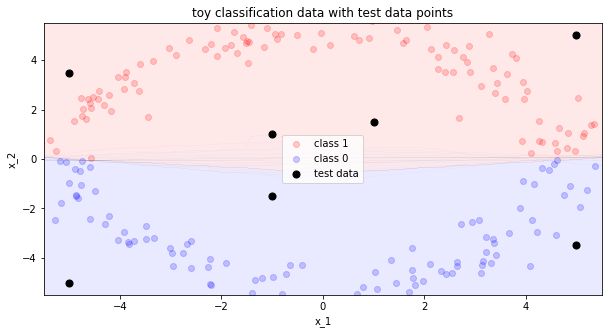

In [ ]:
# Visualize our test data points
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], alpha=0.2, c='red', label='class 1')
ax.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], alpha=0.2, c='blue', label='class 0')
plot_decision_boundary(x_train, y_train, nn_all, ax, poly_degree=1, test_points=test_points, shaded=True)

ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_title('toy classification data with test data points')
ax.legend(loc='best')
plt.show()

xx (40000, 2)


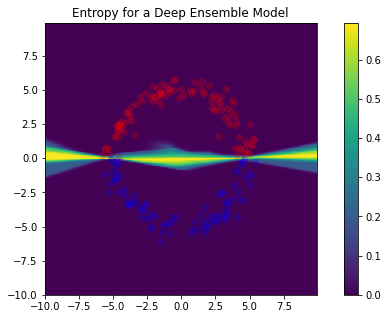

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], alpha=0.2, c='red', label='class 1')
ax.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], alpha=0.2, c='blue', label='class 0')

plot_entropycontours(x_train, y_train, nn_all, w_bootstrap, ax, 'Entropy for a Deep Ensemble Model', poly_degree=1, test_points=test_points, shaded=True, interval=np.arange(-10, 10, 0.1))# for i in range(len(test_points)):
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_title('toy classification data with test data points')
ax.legend(loc='best')

plt.show()

In [ ]:
nn_all[0].forward(w_bootstrap[0], np.array([30, 30]).reshape(1, 2))

AssertionError: 

In [ ]:
# set random state to make the experiments replicable
rand_state = 0
random = np.random.RandomState(rand_state)

width = 6
hidden_layers = 2
input_dim = x_train.shape[1]
output_dim = 1

architecture_dropout = {'width': width,
               'hidden_layers': hidden_layers,
               'input_dim': input_dim,
               'output_dim': output_dim,
               'dropout_rate': 0.1,
               'activation_fn_type': activation_fn_type,
               'activation_fn_params': 'rate=1',
               'activation_fn': activation_fn}


#instantiate a Feedforward neural network object
nn_dropout = Feedforward_Dropout(architecture_dropout, random=random)

params = {'step_size':1e-3, 
          'max_iteration':10000, 
          'random_restarts':1}
#fit my neural network to minimize MSE on the given data
nn_dropout.fit(x_train.T, y_train.reshape((1,-1)), params, reg_param = .001)

Iteration 0 lower bound 1685.7068577655898; gradient mag: 2196.4844041688807
Iteration 100 lower bound 1283.8621802285509; gradient mag: 204.5694081004486
Iteration 200 lower bound 1317.7391115852458; gradient mag: 1443.2488628543001
Iteration 300 lower bound 1293.1467896058823; gradient mag: 207.00000126385163
Iteration 400 lower bound 166.8902527501849; gradient mag: 214.22538912236425
Iteration 500 lower bound 73.80425147583449; gradient mag: 148.9335617948064
Iteration 600 lower bound 81.13491493594148; gradient mag: 106.4449930616953
Iteration 700 lower bound 73.16503108892985; gradient mag: 63.56598090958208
Iteration 800 lower bound 55.98384130875478; gradient mag: 114.9717057810474
Iteration 900 lower bound 63.71211597965315; gradient mag: 73.74137853687924
Iteration 1000 lower bound 46.35559998960118; gradient mag: 46.50704684991825
Iteration 1100 lower bound 57.35405096028629; gradient mag: 45.42291714970229
Iteration 1200 lower bound 42.290740800028935; gradient mag: 74.0316

/home/jovyan/work/am207/baselines.py:498: UserWarning: No contour levels were found within the data range.
  CS=ax.contour(x1, x2, yy, colors='black', linewidths=linewidths, alpha=alpha_line,levels=[-0.5,0.5, 1.5])


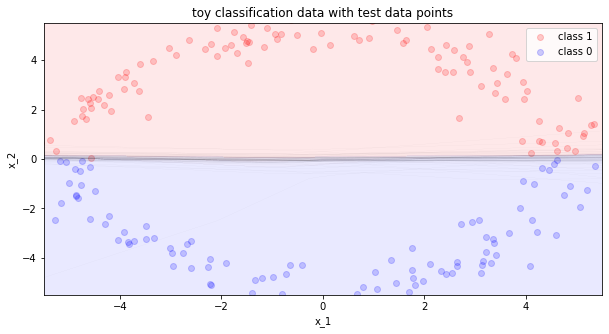

In [ ]:
# Visualize our test data points
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], alpha=0.2, c='red', label='class 1')
ax.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], alpha=0.2, c='blue', label='class 0')

plot_decision_boundary(x_train, y_train, [nn_dropout]*100, ax, poly_degree=1, test_points=None, shaded=True)
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_title('toy classification data with test data points')
ax.legend(loc='best')

plt.show()

xx (40000, 2)


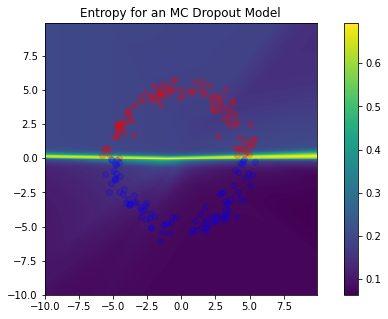

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], alpha=0.2, c='red', label='class 1')
ax.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], alpha=0.2, c='blue', label='class 0')

plot_entropycontours(x_train, y_train, nn_dropout, [nn_dropout.weights]*50, ax, 'Entropy for an MC Dropout Model', poly_degree=1, test_points=test_points, shaded=True, interval=np.arange(-10, 10, 0.1))# for i in range(len(test_points)):
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_title('toy classification data with test data points')
ax.legend(loc='best')

plt.show()

In [ ]:
S = 20
max_iteration = 10000
step_size = 1e-3

Sigma_W = np.eye(nn.D)*25
sigma_y = 1

variational_params = variational_inference(Sigma_W, sigma_y, y_train, x_train.T, nn, nn.forward, S, max_iteration, step_size, 1)


Optimizing variational parameters...
Iteration 0 lower bound -413.7310410569822; gradient mag: 6.100331015765449
Iteration 100 lower bound -409.83501610157543; gradient mag: 6.09905990601623
Iteration 200 lower bound -405.9591449999291; gradient mag: 6.097939051399683
Iteration 300 lower bound -402.1002758741914; gradient mag: 6.096784441333452
Iteration 400 lower bound -398.2569134273325; gradient mag: 6.095603971644553
Iteration 500 lower bound -394.4282675777289; gradient mag: 6.094172331604952
Iteration 600 lower bound -390.61334416629916; gradient mag: 6.09279893427351
Iteration 700 lower bound -386.8152582188485; gradient mag: 6.091249899805118
Iteration 800 lower bound -383.0341511505585; gradient mag: 6.089772027895498
Iteration 900 lower bound -379.26911357152346; gradient mag: 6.088395629590992
Iteration 1000 lower bound -375.51746076307415; gradient mag: 6.087330154451483
Iteration 1100 lower bound -371.7751477349684; gradient mag: 6.0869020098874005
Iteration 1200 lower bou

In [ ]:
var_means = variational_params[0:nn.D]
var_variance = np.exp(variational_params[nn.D:])**2


samples = 100
class_0 = np.random.multivariate_normal([-1, -1], 0.5 * np.eye(2), samples)
class_1 = np.random.multivariate_normal([1, 1], 0.5 * np.eye(2), samples)
x_test = np.vstack((class_0, class_1))
y_test = np.array([0] * samples + [1] * samples)


posterior_sample_size = 200
posterior_samples = np.random.multivariate_normal(var_means, np.diag(var_variance), size=posterior_sample_size)
y_predict_noiseless = nn.forward(posterior_samples, x_test.T) # CHECK: Why are we doing the forward through the DROPOUT model?
y_predict_noiseless = np.squeeze(y_predict_noiseless)

xx (40000, 2)


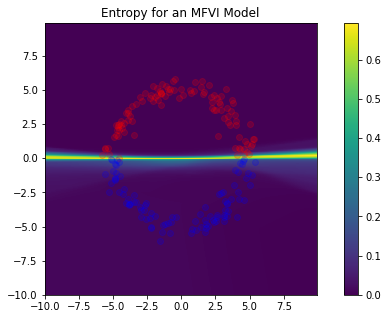

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], alpha=0.2, c='red', label='class 1')
ax.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], alpha=0.2, c='blue', label='class 0')

plot_entropycontours(x_train, y_train, nn, [posterior_samples[i].reshape((1, -1)) for i in range(posterior_samples.shape[0])], ax, 'Entropy for an MFVI Model', poly_degree=1, test_points=test_points, shaded=True, interval=np.arange(-10, 10, 0.1))# for i in range(len(test_points)):
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_title('toy classification data with test data points')
ax.legend(loc='best')

plt.show()

In [126]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


array([[[1.]]])

In [ ]:
myentropy(nn_all[0], [w_bootstrap[0]], np.array([10, 10]).reshape((-1, 1)))[0]==1

array([ True])

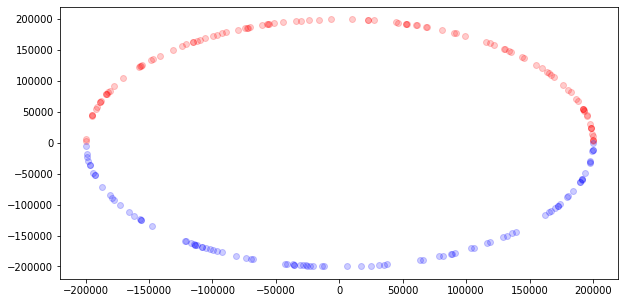

In [ ]:
testarr = np.array([[1, 0, 1], [1, 1 , 0]])
np.all(testarr, axis=0), np.all(testarr, axis=1)

(array([ True, False, False]), array([False, False]))

In [66]:
def generate_3blobs(n_train, centers, std):
    neach = int(n_train/2)
    rng = np.random.default_rng()
    blob1 = rng.normal(loc=centers[0], scale = std, size=int(neach-10)*2).reshape((-1, 2))
    blob2 = rng.normal(loc=centers[1], scale=std, size=neach*2).reshape((-1, 2))
    blob3 = rng.normal(loc=centers[2], scale=std, size=10*2).reshape((-1, 2))
    print (blob1.shape, blob3.shape)
    x = np.vstack([blob1, blob2, blob3])
    y = np.asarray([1]*(neach-10)+[0]*neach+[1]*10)
    return x, y

(90, 2) (10, 2)


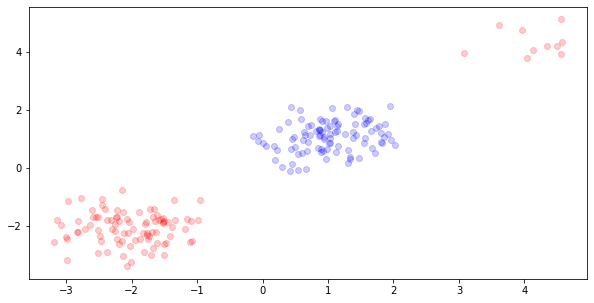

In [67]:
x_train, y_train = generate_3blobs(200, [-2.0, 1.0, 4.0], std=0.5)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], alpha=0.2, c='red', label='class 1')
ax.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], alpha=0.2, c='blue', label='class 0')
plt.show()

### Training the Baselines
Increased width

In [68]:
# Deterministic model 
###relu activation
activation_fn_type = 'relu' #'leaky_relu'
activation_fn = lambda x: np.maximum(np.zeros(x.shape), x) #np.maximum(np.ones(x.shape)*1e-3, x) #WARNING: CHANGED THIS TO LEAKY RELU

###neural network model design choices
width = 4 #CHANGE THIS LATER
hidden_layers = 3
input_dim = x_train.shape[1]
output_dim = 1

architecture = {'width': width,
               'hidden_layers': hidden_layers,
               'input_dim': input_dim,
               'output_dim': output_dim,
               'activation_fn_type': activation_fn_type,
               'activation_fn_params': 'rate=1',
               'activation_fn': activation_fn}

#set random state to make the experiments replicable
rand_state = 0
random = np.random.RandomState(rand_state)

#instantiate a Feedforward neural network object
nn = Feedforward(architecture, random=random)
###define design choices in gradient descent
params = {'step_size':1e-3, 
          'max_iteration':10000, 
          'random_restarts':1}
        
#fit my neural network to minimize MSE on the given data
nn.fit(x_train.T, y_train.reshape((1,-1)), params, reg_param = 0.0002)

Iteration 0 lower bound 654.6257425017143; gradient mag: 837.4098086937927
Iteration 500 lower bound 107.60156371900582; gradient mag: 46.34131955643061
Iteration 1000 lower bound 75.607257577181; gradient mag: 51.58123527214391
Iteration 1500 lower bound 34.063739284129305; gradient mag: 31.040732458155315
Iteration 2000 lower bound 23.625037807700195; gradient mag: 21.495533749642973
Iteration 2500 lower bound 17.165328998954998; gradient mag: 15.7387125613766
Iteration 3000 lower bound 12.84248911708482; gradient mag: 12.017108576908903
Iteration 3500 lower bound 9.80932473848096; gradient mag: 9.324890027590191
Iteration 4000 lower bound 7.606161920249786; gradient mag: 7.312529780523148
Iteration 4500 lower bound 5.961224563889579; gradient mag: 8.021972449382618
Iteration 5000 lower bound 4.709900360751205; gradient mag: 4.594633619738659
Iteration 5500 lower bound 3.744100286226091; gradient mag: 3.670033089992815
Iteration 6000 lower bound 2.9906703751050765; gradient mag: 2.94

In [69]:
# Deep ensemble
reg_param = 0.0002
random = np.random.RandomState(rand_state)
N_bootstrap = 20
nn_all, w_bootstrap = ensemble(x_train, y_train, Feedforward, architecture, params, random, N_bootstrap, reg_param)

/work/am207/baselines.py:335: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  data = pd.DataFrame(pd.np.column_stack([x_train, y_train]))
Iteration 0 lower bound 693.3397026333303; gradient mag: 897.6103112578015
Iteration 500 lower bound 81.3562299681581; gradient mag: 92.70080025273512
Iteration 1000 lower bound 41.18891581358547; gradient mag: 35.874713079894015
Iteration 1500 lower bound 29.65518113982369; gradient mag: 25.38701677262421
Iteration 2000 lower bound 21.93371034993915; gradient mag: 19.185141913920145
Iteration 2500 lower bound 16.483591395565693; gradient mag: 14.777622775399633
Iteration 3000 lower bound 12.55799181599937; gradient mag: 11.494441730201489
Iteration 3500 lower bound 9.680186995741494; gradient mag: 9.008744688727008
Iteration 4000 lower bound 7.5360273071486255; gradient mag: 7.10398978247389
Iteration 4500 lower bound 5.914280128329741; gradient mag: 5.63237649652

In [70]:
# set random state to make the experiments replicable
rand_state = 0
random = np.random.RandomState(rand_state)

width = 4
hidden_layers = 3
input_dim = x_train.shape[1]
output_dim = 1

architecture_dropout = {'width': width,
               'hidden_layers': hidden_layers,
               'input_dim': input_dim,
               'output_dim': output_dim,
               'dropout_rate': 0.1,
               'activation_fn_type': activation_fn_type,
               'activation_fn_params': 'rate=1',
               'activation_fn': activation_fn}


#instantiate a Feedforward neural network object
nn_dropout = Feedforward_Dropout(architecture_dropout, random=random)

params = {'step_size':1e-3, 
          'max_iteration':10000, 
          'random_restarts':1}
#fit my neural network to minimize MSE on the given data
nn_dropout.fit(x_train.T, y_train.reshape((1,-1)), params, reg_param = .001)

Iteration 0 lower bound 452.887325102203; gradient mag: 706.0720838302036
Iteration 500 lower bound 141.87425144616947; gradient mag: 17.847384433925228
Iteration 1000 lower bound 133.91024392813932; gradient mag: 46.287721805258116


Iteration 1500 lower bound 111.01706008599264; gradient mag: 37.84470844305198
Iteration 2000 lower bound 137.98685471367043; gradient mag: 138.04315914436827
Iteration 2500 lower bound 133.02381953376744; gradient mag: 176.8793087510386
Iteration 3000 lower bound 144.38360150061825; gradient mag: 118.49921635559606
Iteration 3500 lower bound 107.61123671625826; gradient mag: 80.53742144469878
Iteration 4000 lower bound 28.607657421610615; gradient mag: 221.89068291023798
Iteration 4500 lower bound 13.300770590520829; gradient mag: 90.79746550244758
Iteration 5000 lower bound 8.867535889862474; gradient mag: 183.8128180334242
Iteration 5500 lower bound 16.077546841773486; gradient mag: 137.326161705541
Iteration 6000 lower bound 41.58946973711376; gradient mag: 22.70499892177933
Iteration 6500 lower bound 54.63116157486324; gradient mag: 78.12847672094712
Iteration 7000 lower bound 3.0875515495955224; gradient mag: 36.99114445695843
Iteration 7500 lower bound 14.834238847161268; gradie

In [71]:
S = 20
max_iteration = 10000
step_size = 1e-3

Sigma_W = np.eye(nn.D)*25
sigma_y = 1

variational_params = variational_inference(Sigma_W, sigma_y, y_train, x_train.T, nn, nn.forward, S, max_iteration, step_size, 1)
var_means = variational_params[0:nn.D]
var_variance = np.exp(variational_params[nn.D:])**2


samples = 100
class_0 = np.random.multivariate_normal([-1, -1], 0.5 * np.eye(2), samples)
class_1 = np.random.multivariate_normal([1, 1], 0.5 * np.eye(2), samples)
x_test = np.vstack((class_0, class_1))
y_test = np.array([0] * samples + [1] * samples)


posterior_sample_size = 20
posterior_samples = np.random.multivariate_normal(var_means, np.diag(var_variance), size=posterior_sample_size)
y_predict_noiseless = nn.forward(posterior_samples, x_test.T) # CHECK: Why are we doing the forward through the DROPOUT model?
y_predict_noiseless = np.squeeze(y_predict_noiseless)

Optimizing variational parameters...
Iteration 0 lower bound -635.9729536060157; gradient mag: 7.564068113095913
Iteration 100 lower bound -630.0458911282684; gradient mag: 7.562163593339168
Iteration 200 lower bound -624.1631851869784; gradient mag: 7.560581007052853
Iteration 300 lower bound -618.309108894043; gradient mag: 7.559505868162895
Iteration 400 lower bound -612.4736975628009; gradient mag: 7.558671117556678
Iteration 500 lower bound -606.6527408146247; gradient mag: 7.5579269081757285
Iteration 600 lower bound -600.8435585700461; gradient mag: 7.557290779281256
Iteration 700 lower bound -595.0444488170201; gradient mag: 7.55670757715233
Iteration 800 lower bound -589.2543275795188; gradient mag: 7.556182194109771
Iteration 900 lower bound -583.472395236299; gradient mag: 7.555685380346066
Iteration 1000 lower bound -577.697783679371; gradient mag: 7.555246926727694
Iteration 1100 lower bound -571.9297526674125; gradient mag: 7.554844162251412
Iteration 1200 lower bound -56

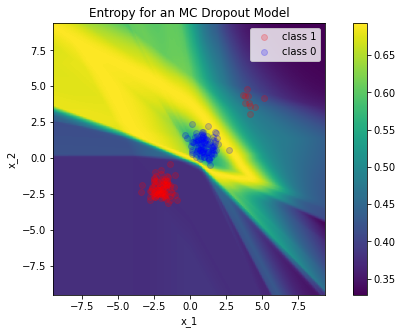

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], alpha=0.2, c='red', label='class 1')
ax.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], alpha=0.2, c='blue', label='class 0')

cl = plot_entropycontours(x_train, y_train, nn_dropout, [nn_dropout.weights]*20, ax, 'Entropy for an MC Dropout Model', poly_degree=1, test_points=None, shaded=True, interval=np.arange(-10, 10, 0.1))# for i in range(len(test_points)):
ax.legend(loc='best')
plt.colorbar(cl)
plt.show()

/home/jovyan/work/am207/baselines.py:506: UserWarning: No contour levels were found within the data range.
  CS=ax.contour(x1, x2, yy, colors='black', linewidths=linewidths, alpha=alpha_line,levels=[-0.5,0.5, 1.5])


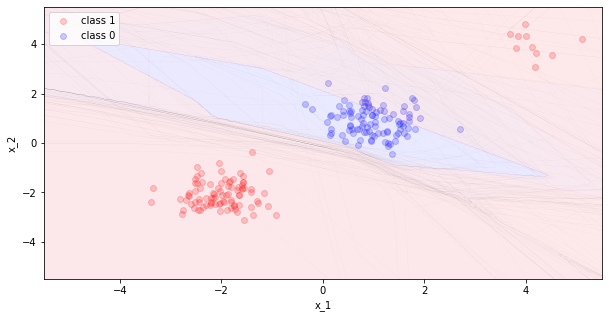

In [ ]:
# Visualize our test data points
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], alpha=0.2, c='red', label='class 1')
ax.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], alpha=0.2, c='blue', label='class 0')

plot_decision_boundary(x_train, y_train, [nn_dropout]*100, ax, poly_degree=1, test_points=None, shaded=True)
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
#ax.set_title('toy classification data with test data points')
ax.legend(loc='best')

plt.show()

/opt/venv/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/home/jovyan/work/am207/uncertainty.py:42: RuntimeWarning: invalid value encountered in multiply
  


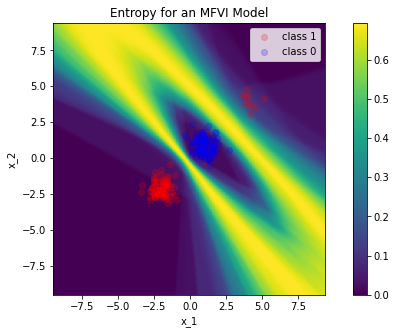

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], alpha=0.2, c='red', label='class 1')
ax.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], alpha=0.2, c='blue', label='class 0')

cl = plot_entropycontours(x_train, y_train, nn, [posterior_samples[i].reshape((1, -1)) for i in range(posterior_samples.shape[0])], ax, 'Entropy for an MFVI Model', poly_degree=1, test_points=None, shaded=True, interval=np.arange(-10, 10, 0.1))# for i in range(len(test_points)):
ax.legend(loc='best')
plt.colorbar(cl)
plt.show()

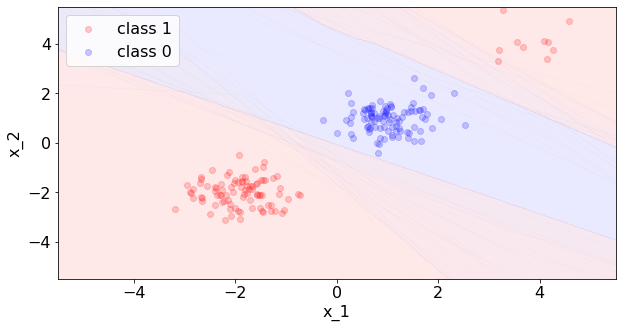

In [12]:
# Visualize our test data points
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], alpha=0.2, c='red', label='class 1')
ax.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], alpha=0.2, c='blue', label='class 0')
modsvi = []
for i in range(20):
    mod = Feedforward(architecture, random)
    mod.weights = posterior_samples[i].reshape((1, -1))
    modsvi.append(mod)
plot_decision_boundary(x_train, y_train, modsvi, ax, poly_degree=1, test_points=None, shaded=True)
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
#ax.set_title('toy classification data with test data points')
ax.legend(loc='best')

plt.show()

/work/am207/baselines.py:506: UserWarning: No contour levels were found within the data range.
  CS=ax.contour(x1, x2, yy, colors='black', linewidths=linewidths, alpha=alpha_line,levels=[-0.5,0.5, 1.5])


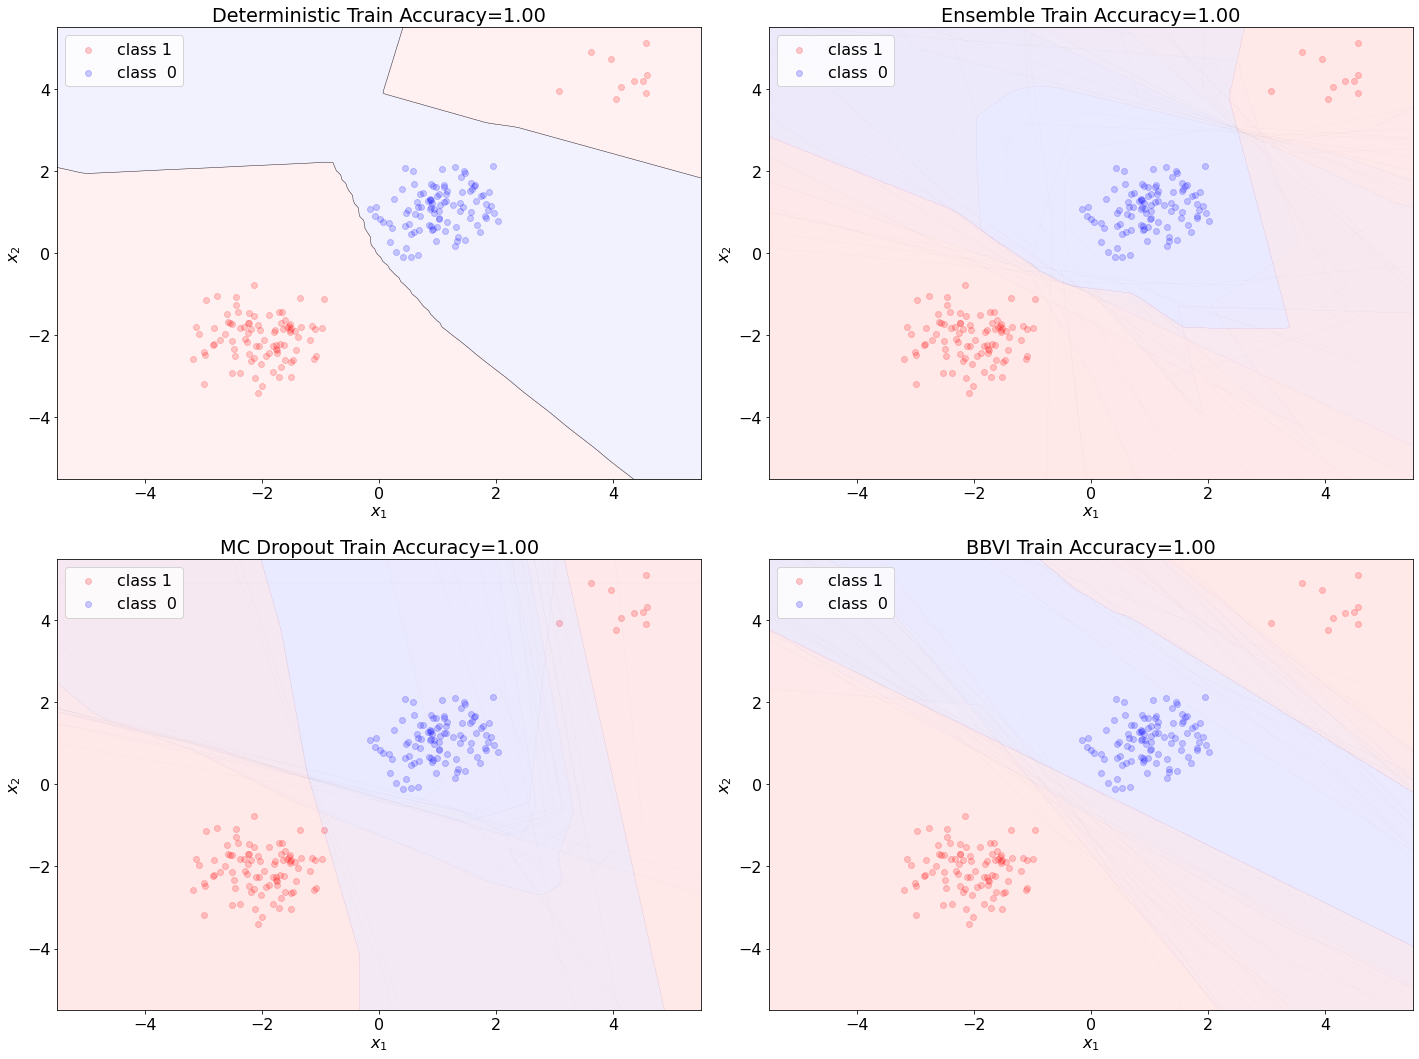

In [72]:
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
k = 0 
models = ['Deterministic', 'Ensemble', 'MC Dropout', 'BBVI']

for i in range(2):
    for j in range(2):
        
        ax[i][j].scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], alpha=0.2, c='red', label='class 1')
        ax[i][j].scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], alpha=0.2, c='blue', label='class  0')
        if k == 0: 
            nn_here = [nn]
            train_acc = get_accuracy('Deterministic', nn, [], x_train, y_train)
        elif k == 1: 
            nn_here = nn_all 
            train_acc = get_accuracy('Deep Ensemble', nn_all[0], w_bootstrap, x_train, y_train)

        elif k == 2: 
            nn_here = [nn_dropout]*20
            train_acc = get_accuracy('Dropout', nn_dropout, [nn_dropout.weights]*50, x_train, y_train)
        elif k == 3: 
            nn_here = modsvi
            train_acc = get_accuracy('MFVI', nn, [posterior_samples[i].reshape((1, -1)) for i in range(posterior_samples.shape[0])], x_train, y_train)
        plot_decision_boundary(x_train, y_train, nn_here, ax[i][j], poly_degree=1, shaded=True)
        ax[i][j].set_xlabel('$x_1$')
        ax[i][j].set_ylabel('$x_2$')
        ax[i][j].set_title(models[k]+' Train Accuracy={:.2f}'.format(train_acc))
        ax[i][j].legend(loc='best')
        k+= 1 
plt.tight_layout()
plt.show()

/opt/venv/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
/opt/venv/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/work/am207/uncertainty.py:42: RuntimeWarning: invalid value encountered in multiply
  p2narray = np.mean(p2narray, axis=0)


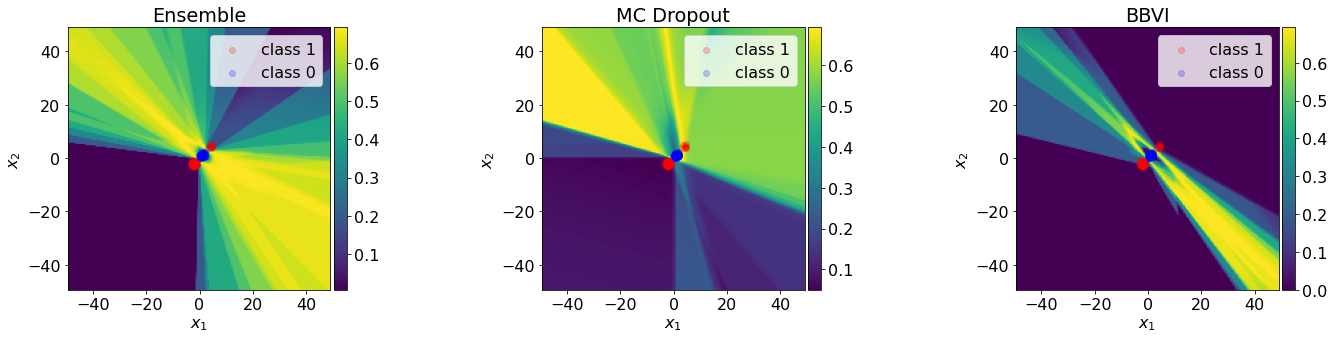

In [73]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
models = ['Ensemble', 'MC Dropout', 'BBVI']
for k in range(3):
    plt.rcParams.update({'font.size': 16})
    ax[k].scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], alpha=0.2, c='red', label='class 1')
    ax[k].scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], alpha=0.2, c='blue', label='class 0')
    if k == 0: 
        nn_here = nn_all 
        cl=plot_entropycontours(x_train, y_train, nn_here, w_bootstrap, ax[k], models[k], poly_degree=1, shaded=True, interval=np.arange(-50, 50, 0.5))
    
    elif k == 1: 
        nn_here = nn_dropout
        weights_here = [nn_dropout.weights]*50
        cl=plot_entropycontours(x_train, y_train, nn_here, weights_here, ax[k], models[k], poly_degree=1, shaded=True, interval=np.arange(-50, 50, 0.5))

    elif k == 2: 
        nn_here = modsvi
        cl=plot_entropycontours(x_train, y_train, nn, [posterior_samples[i].reshape((1, -1)) for i in range(posterior_samples.shape[0])], ax[k], models[k], poly_degree=1, shaded=True, interval=np.arange(-50, 50, 0.5))
    
    divider = make_axes_locatable(ax[k])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(cl, cax=cax, orientation='vertical');
    ax[k].set_xlabel('$x_1$')
    ax[k].set_ylabel('$x_2$')
    ax[k].set_title(models[k])
    ax[k].legend(loc='best')
    
plt.tight_layout()
plt.show()

In [128]:
# define functions to calculate accuracy and referral rate

def accuracy(retain_perc, N, x_test, y_test):
    auc_dropout = np.zeros([len(retain_perc),N])
    auc_det = np.zeros([len(retain_perc),N])
    auc_ens = np.zeros([len(retain_perc),N])
    auc_bbvi = np.zeros([len(retain_perc),N])
    for (i, perc) in enumerate(retain_perc):
        auc_dropout[i,:] = auc_calc_beta(x_test, y_test, nn_dropout, N, perc, "mc") #all x, 1 perc, all w
        posterior_samples = np.random.multivariate_normal(var_means, np.diag(var_variance), size=N)
        auc_bbvi[i,:] = auc_calc_beta(x_test, y_test, nn, N, perc, "bbvi", weightlist=posterior_samples)
        ensi = auc_calc_beta(x_test, y_test, nn, N, perc, "ensemble", weightlist=w_bootstrap[:N])
        auc_ens[i,:] = ensi #Changed to N
        #print (ensi)
        # use sigmoid probability for retaining data
        auc_det[i,:] = auc_calc_beta(x_test, y_test, nn, N, perc, "deterministic")
    return auc_det, auc_ens, auc_dropout, auc_bbvi


def accuracy_plot(auc_det, auc_ens, auc_dropout, auc_bbvi, x_train, y_train, x_test, y_test, retain_perc):

    auc_dropout_ub = np.percentile(auc_dropout, 97.5, axis=1)
    auc_dropout_lb = np.percentile(auc_dropout, 2.5, axis=1)

    auc_ub_ens = np.percentile(auc_ens, 97.5, axis=1)
    auc_lb_ens = np.percentile(auc_ens, 2.5, axis=1)

    auc_ub_bbvi = np.percentile(auc_bbvi, 97.5, axis=1)
    auc_lb_bbvi = np.percentile(auc_bbvi, 2.5, axis=1)
    
    plt.rcParams.update({'font.size': 16})
    fig,ax=plt.subplots(1,2,figsize=(20,5))
    ax[0].scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], alpha=0.2, c='red', label='class 1')
    ax[0].scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], alpha=0.2, c='blue', label='class 0')
    ax[0].scatter(x_test[y_test == 1, 0], x_test[y_test == 1, 1], alpha=0.8, c='red', label='test class 1')
    ax[0].scatter(x_test[y_test == 0, 0], x_test[y_test == 0, 1], alpha=0.8, c='blue', label='test class 0')
    ax[0].set_xlabel('$x_1$')
    ax[0].set_ylabel('$x_2$')
    ax[0].legend()
    ax[0].set_title('Visualization of training and test sets')
    ax[1].fill_between(retain_perc, auc_dropout_ub, auc_dropout_lb, color='blue', alpha=0.2)
    ax[1].plot(retain_perc, np.mean(auc_dropout,axis=1), 'blue', label='MC dropout')
    ax[1].plot(retain_perc, np.mean(auc_ens,axis=1), 'red', label='Ensemble')
    ax[1].plot(retain_perc, np.mean(auc_bbvi,axis=1), 'purple', label='BBVI')
    ax[1].plot(retain_perc, np.mean(auc_det,axis=1), 'green', label='Deterministic')
    ax[1].fill_between(retain_perc, auc_ub_bbvi, auc_lb_bbvi, color='purple', alpha=0.2)
    ax[1].fill_between(retain_perc, auc_ub_ens, auc_lb_ens, color='red', alpha=0.2)
    ax[1].set_xlabel("Retained Data")
    ax[1].set_ylabel("Accuracy")
    ax[1].set_title("Accuracy of different models")
    ax[1].set_xlim((min(retain_perc), max(retain_perc)))
#     ax[1].set_ylim((30, 90))
    ax[1].legend()
    plt.show()



### Accuracy vs Retention for the Training Data

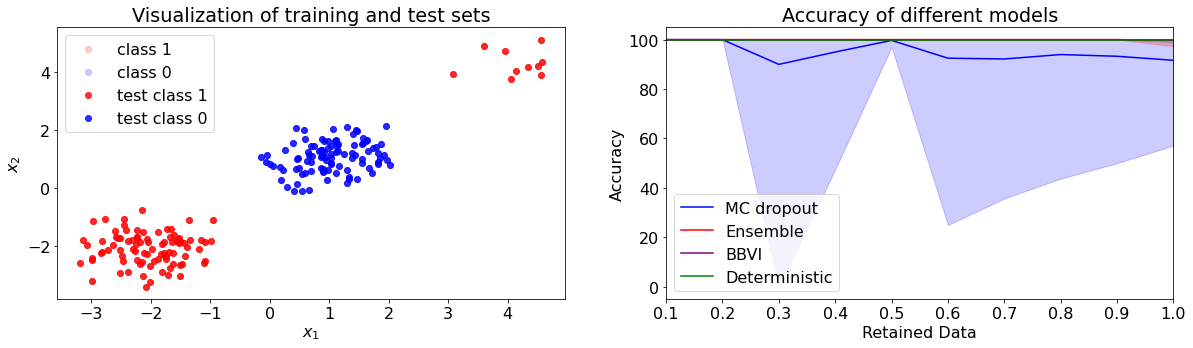

In [133]:
N=20
retain_perc = np.arange(0.1, 1.1, 0.1)

auc_det, auc_ens, auc_dropout, auc_bbvi = accuracy(retain_perc, N, x_train, y_train)
accuracy_plot(auc_det, auc_ens, auc_dropout, auc_bbvi, x_train, y_train, x_train, y_train, retain_perc)

### Test Data 1: 
Shift, Labels are determined by random noise

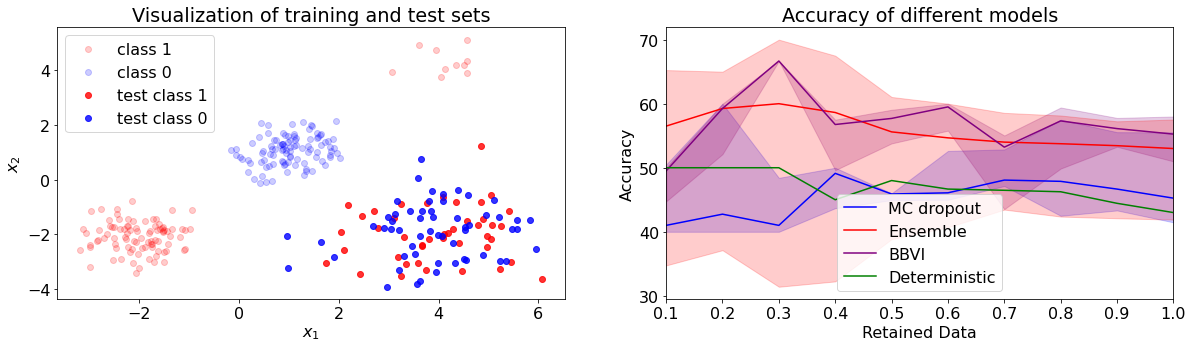

In [134]:
rng = np.random.default_rng()
x_cl1 = np.hstack([rng.normal(4, 1.0, 100).reshape((-1, 1)), rng.normal(-2, 1.0, 100).reshape((-1, 1))])
y_cl1=rng.integers(low=0, high=2, size=100)
auc_det, auc_ens, auc_dropout, auc_bbvi = accuracy(retain_perc, N, x_cl1, y_cl1)
accuracy_plot(auc_det, auc_ens, auc_dropout, auc_bbvi, x_train, y_train, x_cl1, y_cl1, retain_perc)

### Test Data 1: 
Test data has the same centers as those of the training clusters, but more noise. 

(90, 2) (10, 2)
/opt/venv/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/work/am207/uncertainty.py:71: RuntimeWarning: invalid value encountered in multiply
  Hpredcheck = -p1narraym*np.log(p1narraym) - p2narraym*np.log(p2narraym)


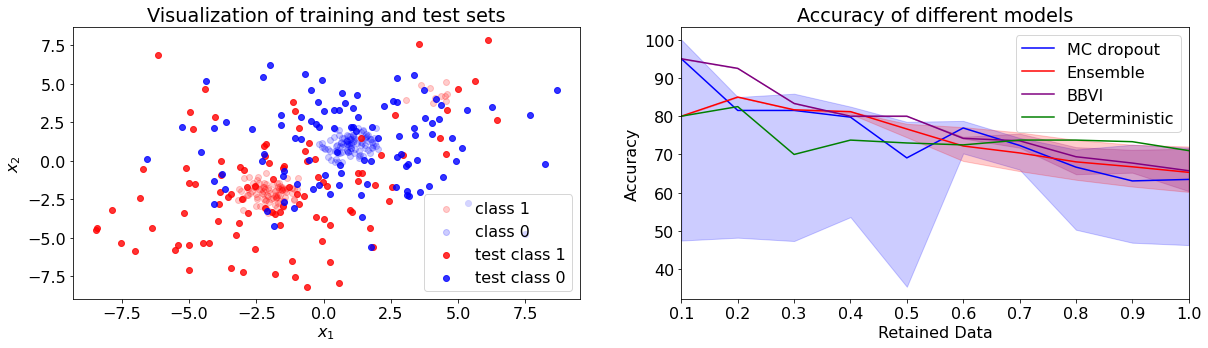

In [159]:
x_cl2, y_cl2 = generate_3blobs(200, [-2.0, 1.0, 4.0], std=3.0)
auc_det, auc_ens, auc_dropout, auc_bbvi = accuracy(retain_perc, N, x_cl2, y_cl2)
accuracy_plot(auc_det, auc_ens, auc_dropout, auc_bbvi, x_train, y_train, x_cl2, y_cl2, retain_perc)

### Test Data 2: 
Let's assume the 'true' class membership is determined by the distance to the nearest cluster.
#### 2.1. Test Data where all the reds are from the 'outlier' pool, data is shifted

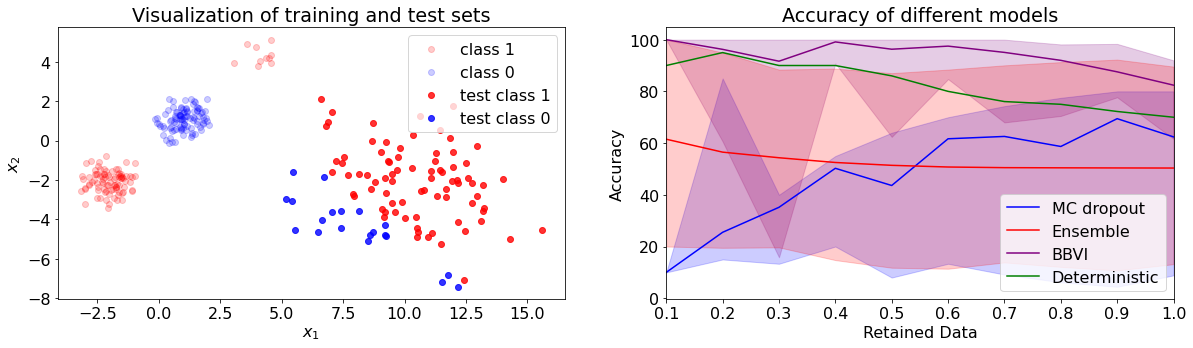

In [149]:
rng = np.random.default_rng()
x_cl1 = np.hstack([rng.normal(10, 2.0, 100).reshape((-1, 1)), rng.normal(-2, 2.0, 100).reshape((-1, 1))])
distmainred = np.linalg.norm(x_cl1 - np.array([-2, -2]).reshape((-1, 2)), axis=1)
distminred = np.linalg.norm(x_cl1 - np.array([4, 4]).reshape((-1, 2)), axis=1)
distred = np.minimum(distmainred, distminred)
distblue = np.linalg.norm(x_cl1 - np.array([1, 1]).reshape((-1, 2)), axis=1)
closest = np.minimum(distblue, distred)
y_cl1 = np.ones(100)
y_cl1[distblue==closest]=0
auc_det, auc_ens, auc_dropout, auc_bbvi = accuracy(retain_perc, N, x_cl1, y_cl1)
accuracy_plot(auc_det, auc_ens, auc_dropout, auc_bbvi, x_train, y_train, x_cl1, y_cl1, retain_perc)

/opt/venv/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/work/am207/uncertainty.py:71: RuntimeWarning: invalid value encountered in multiply
  Hpredcheck = -p1narraym*np.log(p1narraym) - p2narraym*np.log(p2narraym)


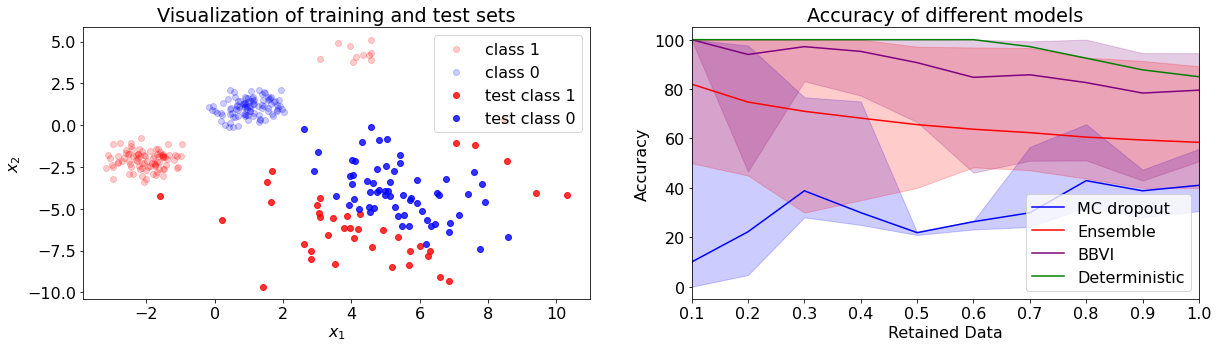

In [153]:
rng = np.random.default_rng()
x_cl1 = np.hstack([rng.normal(5, 2.0, 100).reshape((-1, 1)), rng.normal(-5, 2.0, 100).reshape((-1, 1))])
distmainred = np.linalg.norm(x_cl1 - np.array([-2, -2]).reshape((-1, 2)), axis=1)
distminred = np.linalg.norm(x_cl1 - np.array([4, 4]).reshape((-1, 2)), axis=1)
distred = np.minimum(distmainred, distminred)
distblue = np.linalg.norm(x_cl1 - np.array([1, 1]).reshape((-1, 2)), axis=1)
closest = np.minimum(distblue, distred)
y_cl1 = np.ones(100)
y_cl1[distblue==closest]=0
auc_det, auc_ens, auc_dropout, auc_bbvi = accuracy(retain_perc, N, x_cl1, y_cl1)
accuracy_plot(auc_det, auc_ens, auc_dropout, auc_bbvi, x_train, y_train, x_cl1, y_cl1, retain_perc)

array([[70.        , 70.        , 70.        , 70.        , 70.        ,
        70.        , 70.        , 70.        , 70.        , 70.        ,
        70.        , 70.        , 70.        , 70.        , 70.        ,
        70.        , 70.        , 70.        , 70.        , 70.        ],
       [85.        , 85.        , 85.        , 85.        , 85.        ,
        85.        , 85.        , 85.        , 85.        , 85.        ,
        85.        , 85.        , 85.        , 85.        , 85.        ,
        85.        , 85.        , 85.        , 85.        , 85.        ],
       [80.        , 80.        , 80.        , 80.        , 80.        ,
        80.        , 80.        , 80.        , 80.        , 80.        ,
        80.        , 80.        , 80.        , 80.        , 80.        ,
        80.        , 80.        , 80.        , 80.        , 80.        ],
       [85.        , 85.        , 85.        , 85.        , 85.        ,
        85.        , 85.        , 85.        , 8

In [97]:
pmean, Hmean = myentropy(nn_all[0], w_bootstrap, x_cl2[0, :].reshape((2, -1)))

In [118]:
np.array([[1, 0, 0], [0, 1, 0]])==np.array([1, 0])

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False